## PROJECT 2: CITS5504

### FLAVIAN JEROTICH

**Loading the dataset and checking the first few rows**

I began by loading the provided dataset Project2_Dataset_Corrected.csv into a pandas DataFrame using Jupyter Notebook. The dataset consists of 10,490 rows and 25 columns, containing information about fatal crashes in Australia between 2014 and 2024.

In [1]:
import pandas as pd

# Update the file path if necessary
df = pd.read_csv('Project2_Dataset_Corrected.csv')

# Display the first 5 rows
df.head()


,ID,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Number Fatalities,Bus Involvement,...,Age,National Remoteness Areas,SA4 Name 2021,National LGA Name 2024,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,1,20241115,NSW,12,2024,Friday,4:00,Single,1,No,...,74,Inner Regional Australia,Riverina,Wagga Wagga,Arterial Road,Yes,No,65_to_74,Weekday,Night
1,2,20241125,NSW,12,2024,Friday,6:15,Single,1,No,...,19,Inner Regional Australia,Sydney - Baulkham Hills and Hawkesbury,Hawkesbury,Local Road,No,No,17_to_25,Weekday,Day
2,3,20246013,TAS,12,2024,Friday,9:43,Single,1,No,...,33,Inner Regional Australia,Launceston and North East,Northern Midlands,Local Road,Yes,No,26_to_39,Weekday,Day
3,4,20241002,NSW,12,2024,Friday,10:35,Single,1,No,...,32,Outer Regional Australia,New England and North West,Armidale,National or State Highway,No,No,26_to_39,Weekday,Day
4,5,20243185,QLD,12,2024,Friday,13:00,Single,1,No,...,61,Inner Regional Australia,Toowoomba,Lockyer Valley,National or State Highway,No,No,40_to_64,Weekday,Day


**Checking data summary**

In [2]:
# See column names
print(df.columns)

# See number of rows and columns
print(df.shape)

# Get quick stats (especially useful for numerical columns)
print(df.describe())

# Check for any missing/null values
print(df.isnull().sum())


Index(['ID', 'Crash ID', 'State', 'Month', 'Year', 'Dayweek', 'Time',
       'Crash Type', 'Number Fatalities', 'Bus Involvement',
       'Heavy Rigid Truck Involvement', 'Articulated Truck Involvement',
       'Speed Limit', 'Road User', 'Gender', 'Age',
       'National Remoteness Areas', 'SA4 Name 2021', 'National LGA Name 2024',
       'National Road Type', 'Christmas Period', 'Easter Period', 'Age Group',
       'Day of week', 'Time of day'],
      dtype='object')
(10490, 25)
                 ID      Crash ID         Month          Year  \
count  10490.000000  1.049000e+04  10490.000000  10490.000000   
mean    5245.500000  2.026606e+07      6.549380   2019.397521   
std     3028.346496  3.543390e+06      3.469614      2.889095   
min        1.000000  2.014400e+07      1.000000   2014.000000   
25%     2623.250000  2.017303e+07      3.000000   2017.000000   
50%     5245.500000  2.019507e+07      7.000000   2019.000000   
75%     7867.750000  2.022204e+07     10.000000   2022.0000

The dataset has no missing values, as confirmed by checking for nulls in all columns. This is beneficial since no imputation or cleaning was necessary. The column names cover a range of data categories:

Crash-level details: Crash ID, State, Month, Year, Dayweek, Time, Crash Type, Number Fatalities, etc.

Vehicle involvement: Bus Involvement, Heavy Rigid Truck Involvement, Articulated Truck Involvement.

Person-level details: Road User, Gender, Age, Age Group.

Location details: National LGA Name 2024, SA4 Name 2021, National Remoteness Areas, National Road Type.

Temporal indicators: Christmas Period, Easter Period, Day of week, Time of day.

**Explore any unique values in key columns**

In [3]:
# Check unique values in 'State' column
print(df['State'].unique())

# Check unique values in 'Crash Type'
print(df['Crash Type'].unique())

# Same for any column you're curious about


['NSW' 'TAS' 'QLD' 'SA' 'VIC' 'ACT' 'NT' 'WA']
['Single' 'Multiple']


The dataset spans crashes from 2014 to 2024, with an average speed limit of approximately 82 km/h and an average age of crash victims around 45 years old.

Since the dataset integrates event-level (crash), person-level (road user), and location-level information into a flat table, I identified potential node entities (Crash, Road User, State, LGA, SA4, Road Type, Remoteness) and relationships (such as Crash OCCURRED_IN LGA, Crash INVOLVED Road User, Crash LOCATED_IN SA4).

This exploration informed the graph database schema design, ensuring that node and relationship entities capture meaningful connections inherent in the data.

I designed the property graph schema using Arrows App to represent the relationships between fatal crash events and their associated entities. The schema places the Crash node at the center, connected to six other nodes: RoadUser, State, LGA, SA4, Remoteness, and RoadType.

Each node contains attributes based on the data dictionary provided:

The Crash node includes crash-specific details such as ID, Crash ID, Month, Year, Dayweek, Time, Crash Type, Number Fatalities, Bus Involvement, Heavy Rigid Truck Involvement, Articulated Truck Involvement, Speed Limit, Christmas Period, Easter Period, Day of week, and Time of day.

The RoadUser node represents individuals involved in crashes, including their Road User type, Gender, Age, and Age Group.

The State, LGA, SA4, Remoteness, and RoadType nodes represent the spatial and road attributes associated with the crash.

The relationships in the graph connect Crash to these entities using descriptive relationship types such as INVOLVED, OCCURRED_IN_STATE, OCCURRED_IN, LOCATED_IN_SA4, IN_REMOTENESS_AREA, and HAPPENED_ON.

This schema design normalizes repeated information (like location names) to avoid redundancy and allows querying patterns across different dimensions. For example, it supports queries like “Find all crashes in WA from 2020-2024 involving articulated trucks with multiple fatalities” or “List fatal crashes in inner regional areas with victims aged 17-25.”

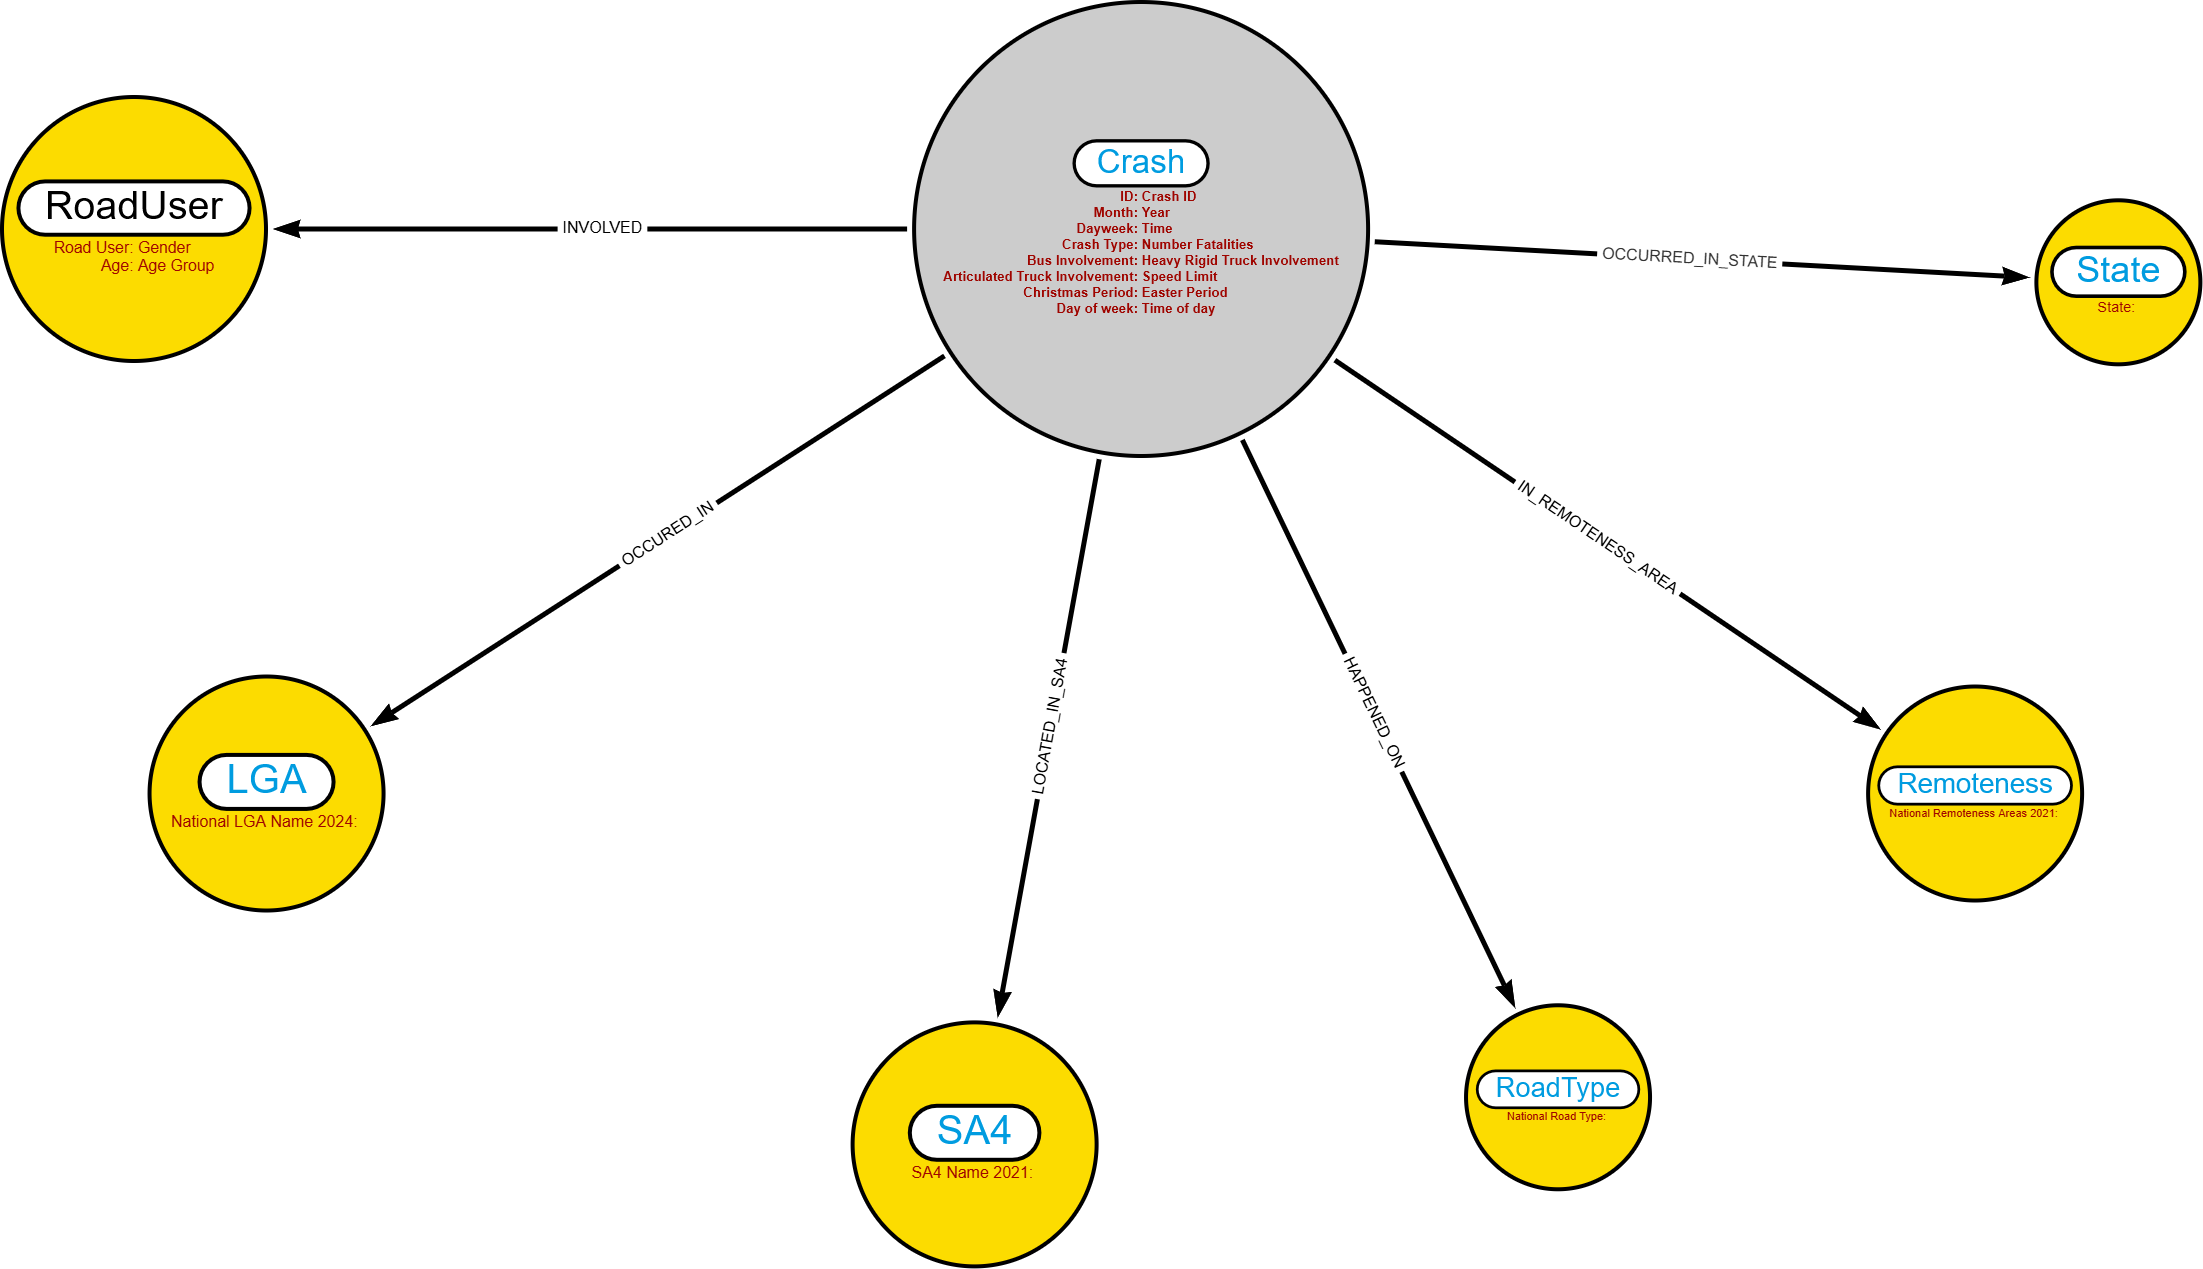


## CREATE NODE CSVS

In [7]:
#crash nodes
df_crash_nodes = df[['ID', 'Crash ID', 'Month', 'Year', 'Dayweek', 'Time', 'Crash Type',
                     'Number Fatalities', 'Bus Involvement', 'Heavy Rigid Truck Involvement',
                     'Articulated Truck Involvement', 'Speed Limit', 'Christmas Period',
                     'Easter Period', 'Day of week', 'Time of day']].drop_duplicates()

df_crash_nodes.to_csv('Crash_Nodes.csv', index=False)

#Creating road user nodes
df_roaduser_nodes = df[['Road User', 'Gender', 'Age', 'Age Group']].drop_duplicates().reset_index(drop=True)
df_roaduser_nodes['RoadUser_ID'] = df_roaduser_nodes.index + 1  # unique IDs starting at 1

df_roaduser_nodes.to_csv('RoadUser_Nodes.csv', index=False)

#state nodes
df_state_nodes = df[['State']].drop_duplicates().reset_index(drop=True)
df_state_nodes['State_ID'] = df_state_nodes.index + 1

df_state_nodes.to_csv('State_Nodes.csv', index=False)

#LGA nodes
df_lga_nodes = df[['National LGA Name 2024']].drop_duplicates().reset_index(drop=True)
df_lga_nodes['LGA_ID'] = df_lga_nodes.index + 1

df_lga_nodes.to_csv('LGA_Nodes.csv', index=False)

#SA4 nodes
df_sa4_nodes = df[['SA4 Name 2021']].drop_duplicates().reset_index(drop=True)
df_sa4_nodes['SA4_ID'] = df_sa4_nodes.index + 1

df_sa4_nodes.to_csv('SA4_Nodes.csv', index=False)

#Remoteness noeds
df_remoteness_nodes = df[['National Remoteness Areas']].drop_duplicates().reset_index(drop=True)
df_remoteness_nodes['Remoteness_ID'] = df_remoteness_nodes.index + 1

df_remoteness_nodes.to_csv('Remoteness_Nodes.csv', index=False)

#road type nodes
df_roadtype_nodes = df[['National Road Type']].drop_duplicates().reset_index(drop=True)
df_roadtype_nodes['RoadType_ID'] = df_roadtype_nodes.index + 1

df_roadtype_nodes.to_csv('RoadType_Nodes.csv', index=False)


In [5]:
# Create Crash → RoadUser Relationship
# ===========================
df_crash_roaduser = df[['ID', 'Road User', 'Gender', 'Age', 'Age Group']]
df_crash_roaduser = df_crash_roaduser.merge(df_roaduser_nodes, on=['Road User', 'Gender', 'Age', 'Age Group'])

df_crash_roaduser_rel = df_crash_roaduser[['ID', 'RoadUser_ID']]
df_crash_roaduser_rel.to_csv('Crash_RoadUser_Relationship.csv', index=False)
print("Crash_RoadUser_Relationship.csv created.")

# ===========================
# Create Crash → State Relationship
# ===========================
df_crash_state = df[['ID', 'State']].merge(df_state_nodes, on='State')
df_crash_state_rel = df_crash_state[['ID', 'State_ID']]
df_crash_state_rel.to_csv('Crash_State_Relationship.csv', index=False)
print("Crash_State_Relationship.csv created.")

# ===========================
# Create Crash → LGA Relationship
# ===========================
df_crash_lga = df[['ID', 'National LGA Name 2024']].merge(df_lga_nodes, on='National LGA Name 2024')
df_crash_lga_rel = df_crash_lga[['ID', 'LGA_ID']]
df_crash_lga_rel.to_csv('Crash_LGA_Relationship.csv', index=False)
print("Crash_LGA_Relationship.csv created.")

# ===========================
# Create Crash → SA4 Relationship
# ===========================
df_crash_sa4 = df[['ID', 'SA4 Name 2021']].merge(df_sa4_nodes, on='SA4 Name 2021')
df_crash_sa4_rel = df_crash_sa4[['ID', 'SA4_ID']]
df_crash_sa4_rel.to_csv('Crash_SA4_Relationship.csv', index=False)
print("Crash_SA4_Relationship.csv created.")

# ===========================
# Create Crash → Remoteness Relationship
# ===========================
df_crash_remoteness = df[['ID', 'National Remoteness Areas']].merge(df_remoteness_nodes, on='National Remoteness Areas')
df_crash_remoteness_rel = df_crash_remoteness[['ID', 'Remoteness_ID']]
df_crash_remoteness_rel.to_csv('Crash_Remoteness_Relationship.csv', index=False)
print("Crash_Remoteness_Relationship.csv created.")

# ===========================
# Create Crash → RoadType Relationship
# ===========================
df_crash_roadtype = df[['ID', 'National Road Type']].merge(df_roadtype_nodes, on='National Road Type')
df_crash_roadtype_rel = df_crash_roadtype[['ID', 'RoadType_ID']]
df_crash_roadtype_rel.to_csv('Crash_RoadType_Relationship.csv', index=False)
print("Crash_RoadType_Relationship.csv created.")


Crash_RoadUser_Relationship.csv created.
Crash_State_Relationship.csv created.
Crash_LGA_Relationship.csv created.
Crash_SA4_Relationship.csv created.
Crash_Remoteness_Relationship.csv created.
Crash_RoadType_Relationship.csv created.


## Cypher constraints: Load nodes